In [2]:
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf
from arch import arch_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("EUA_data.csv", parse_dates=["Date"], index_col="Date")

C:\Users\COBUY\AppData\Local\Temp\ipykernel_15712\3609203649.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("EUA_data.csv", parse_dates=["Date"], index_col="Date")


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3901 entries, 2025-02-28 to 2010-01-04
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     3901 non-null   float64
 1   Open      3901 non-null   float64
 2   High      3901 non-null   float64
 3   Low       3901 non-null   float64
 4   Vol.      3880 non-null   object 
 5   Change %  3901 non-null   object 
dtypes: float64(4), object(2)
memory usage: 213.3+ KB


In [5]:
df = df.sort_index()

In [6]:
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-01-04,13.09,12.71,13.37,12.71,8.74K,4.47%
2010-01-05,12.70,13.18,13.22,12.69,10.79K,-2.98%
2010-01-06,12.41,12.62,12.62,12.28,9.49K,-2.28%
2010-01-07,12.73,12.42,12.77,12.25,12.50K,2.58%
2010-01-08,13.00,12.78,13.24,12.73,16.69K,2.12%


In [7]:
df.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2025-02-24,73.66,74.62,74.99,72.16,31.86K,-0.32%
2025-02-25,71.75,73.76,74.00,71.15,31.67K,-2.59%
2025-02-26,71.02,71.78,72.58,70.69,32.84K,-1.02%
2025-02-27,72.78,71.00,73.53,71.00,35.02K,2.48%
2025-02-28,71.00,72.90,73.69,70.76,27.42K,-2.45%


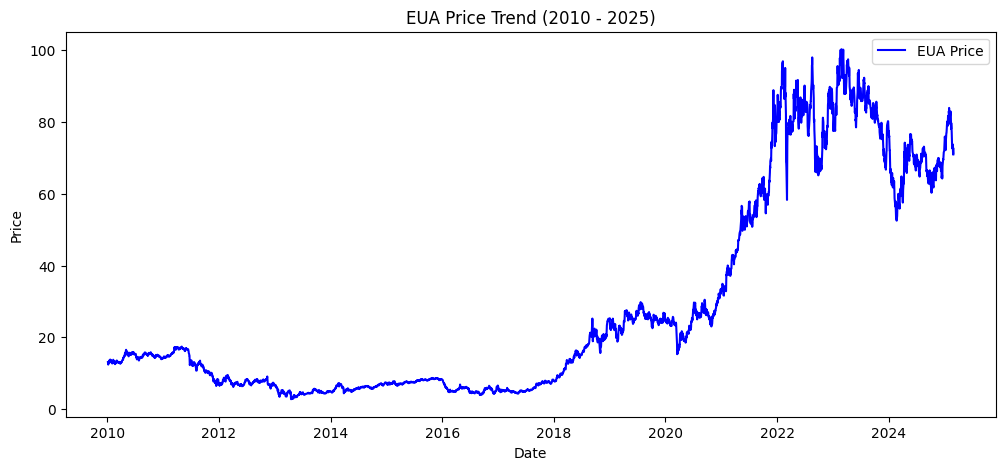

In [8]:
# Plot the original data
plt.figure(figsize=(12, 5))
plt.plot(df['Price'], label="EUA Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Price")
plt.title("EUA Price Trend (2010 - 2025)")
plt.legend()
plt.show()

In [9]:
def adf_test(series):
    result = adfuller(series.dropna())
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
adf_test(df['Price'])

ADF Statistic: -0.20707492147519577
p-value: 0.937673034559343
Non-Stationary


In [10]:
df['Price First Difference']=df['Price']-df['Price'].shift(1)

In [11]:
adf_test(df['Price First Difference'])  # Re-check stationarity


ADF Statistic: -13.781693685490835
p-value: 9.270733710164425e-26
Stationary


In [12]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

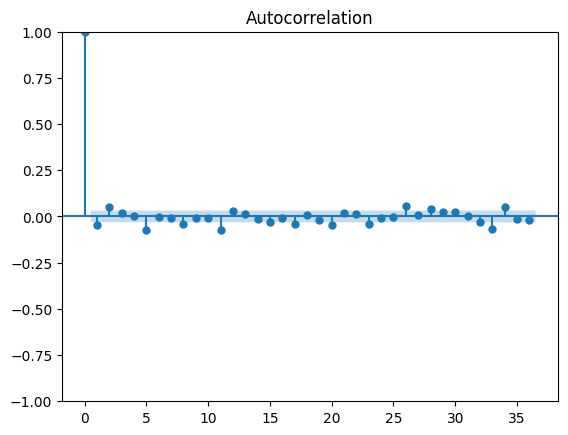

In [13]:
acf = plot_acf(df["Price First Difference"].dropna())

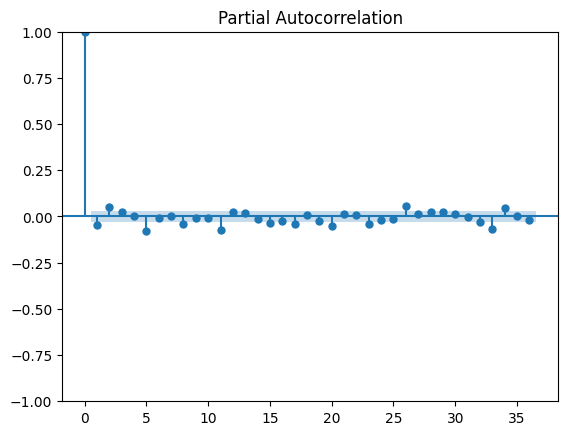

In [14]:
result = plot_pacf(df["Price First Difference"].dropna())

In [15]:

from pmdarima import auto_arima

auto_arima_model = auto_arima(df['Price'], seasonal=False, trace=True)
print(auto_arima_model.summary())


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=11509.705, Time=4.61 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=11533.996, Time=0.16 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=11528.617, Time=0.57 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=11529.301, Time=0.55 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=11532.760, Time=0.13 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=11520.647, Time=2.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=11521.853, Time=5.15 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=12.04 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=31.91 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=11524.048, Time=2.71 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=11521.405, Time=5.51 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=11522.980, Time=4.15 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=29.79 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=11508.440, Time=7.99 sec
 ARIMA(1,1,2)(0,0,0)[0]           

In [16]:
from statsmodels.tsa.arima.model import ARIMA

p, d, q = auto_arima_model.order
arima_model = ARIMA(df['Price'], order=(p, d, q))
arima_result = arima_model.fit()

print(arima_result.summary())


c:\Users\COBUY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\COBUY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\COBUY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\COBUY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 3901
Model:                 ARIMA(4, 1, 5)   Log Likelihood               -5722.951
Date:                Mon, 17 Mar 2025   AIC                          11465.902
Time:                        10:59:42   BIC                          11528.590
Sample:                             0   HQIC                         11488.152
                               - 3901                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3016      0.060      4.997      0.000       0.183       0.420
ar.L2          0.2017      0.015     13.080      0.000       0.171       0.232
ar.L3          0.7861      0.015     51.595      0.0

In [17]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2023,12,31)
test_dataset_end=datetime(2025,2,28)

In [18]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [19]:
p, d, q = auto_arima_model.order
arima_model = ARIMA(df['Price'], order=(p, d, q))
arima_result = arima_model.fit()

c:\Users\COBUY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\COBUY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\COBUY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\COBUY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimiza

In [20]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [21]:
pred=arima_result.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Price']-pred

In [22]:
test_data['Predicted_ARIMA']=pred

C:\Users\COBUY\AppData\Local\Temp\ipykernel_15712\95659616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Figure size 2000x1000 with 0 Axes>

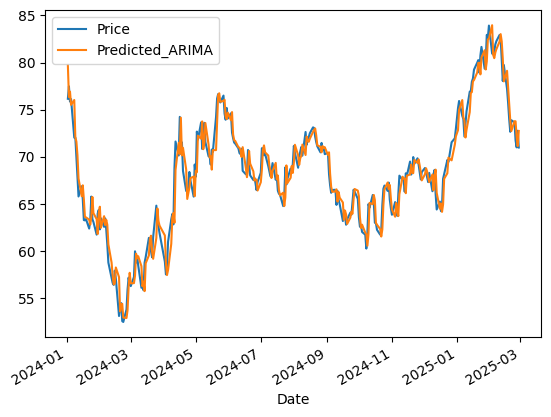

In [23]:
plt.figure(figsize=(20, 10))
test_data[['Price','Predicted_ARIMA']].plot()
plt.show()

In [24]:
mse = mean_squared_error(test_data['Price'], pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Mean Squared Error (MSE): 2.3069
Root Mean Squared Error (RMSE): 1.5188


Forecasting the prices


In [25]:
future_days = 14
forecast = arima_result.forecast(steps=future_days)

c:\Users\COBUY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\COBUY\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [26]:
forecast_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=future_days)
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Predicted Price': forecast.values})

In [27]:
print(forecast_df)

         Date  Predicted Price
0  2025-03-01        71.341213
1  2025-03-02        71.464876
2  2025-03-03        71.688228
3  2025-03-04        71.790401
4  2025-03-05        72.010771
5  2025-03-06        72.214228
6  2025-03-07        72.293466
7  2025-03-08        72.482726
8  2025-03-09        72.610266
9  2025-03-10        72.651830
10 2025-03-11        72.800939
11 2025-03-12        72.863984
12 2025-03-13        72.884712
13 2025-03-14        73.000997


In [28]:
real_price = pd.read_csv('EUA_March_Prices.csv')
df_real = real_price[['Date','Price']]

In [29]:
# Convert 'date' to datetime if not already
forecast_df['date'] = pd.to_datetime(forecast_df['Date'])
df_real['date'] = pd.to_datetime(df_real['Date'])

C:\Users\COBUY\AppData\Local\Temp\ipykernel_15712\1854766758.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_real['date'] = pd.to_datetime(df_real['Date'])
C:\Users\COBUY\AppData\Local\Temp\ipykernel_15712\1854766758.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_real['date'] = pd.to_datetime(df_real['Date'])


In [30]:
# Merge the DataFrames on 'date'
df_diff = pd.merge(forecast_df, df_real, on='date')

In [31]:
# Compute the difference
df_diff['price_difference'] = df_diff['Predicted Price'] - df_diff['Price']

In [32]:
# Display result
print(df_diff[['date', 'Predicted Price', 'Price', 'price_difference']])

        date  Predicted Price  Price  price_difference
0 2025-03-03        71.688228  71.55          0.138228
1 2025-03-04        71.790401  68.50          3.290401
2 2025-03-05        72.010771  68.79          3.220771
3 2025-03-06        72.214228  67.32          4.894228
4 2025-03-07        72.293466  68.63          3.663466
5 2025-03-10        72.651830  69.01          3.641830
6 2025-03-11        72.800939  68.24          4.560939
7 2025-03-12        72.863984  69.62          3.243984
8 2025-03-13        72.884712  70.60          2.284712
9 2025-03-14        73.000997  70.99          2.010997


#### Reasons for Forecast Deviations
1- Market Volatility
Carbon prices fluctuate due to external events such as economic instability, supply-demand shifts, and geopolitical factors.
2- Policy and Regulatory Changes
The introduction of the maritime sector in 2024 into the EU ETS without free allocations has increased demand for EUAs, affecting price movements.
3- Energy Market Dynamics
EUA prices are heavily linked to electricity and industrial production. Sudden changes in coal, gas, and oil prices create forecasting challenges.
4- Model Limitations
ARIMA works well for linear trends, but carbon markets may have nonlinear effects.
Using GARCH models or LSTMs (deep learning) could improve handling unexpected shocks.
